In [4]:
%matplotlib notebook

In [50]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d


def load_file(filename):
    with open(filename, 'r') as infile:
        foo = np.fromfile(infile, dtype=np.uint32)

    with open(filename, 'r') as infile:
        bar = np.fromfile(infile, dtype=np.float32)

    header = foo[:4]
    body = bar[4:]
    
    height, width, channels = header[1], header[2], header[3]
    
    return body.reshape(height, width, channels)


def get_coords(height, width):
    y, x = np.meshgrid(np.arange(0.0, width, 1.0), np.arange(0.0, height, 1.0))
    z = np.float32([0.0] * (height * width))
    z = z.reshape(height, width)
    
    return x, y, z


def subsample(x, height, width, skip=1):
    return np.expand_dims(x[::skip,::skip], -1)


def get_points(filename, skip):
    body = load_file(filename)
    body[np.isnan(body)] = 0.0
    
    h, w, c = body.shape

    x, y, z = get_coords(h, w)
    u, v, w = body[:,:,0], body[:,:,1], body[:,:,2]
    
    return body, [subsample(coord, h, w, skip) for coord in [x, y, z, u, v, w]]


def quiver_plot(x, y, z, u, v, w):
    ax = plt.figure().gca(projection='3d')
    ax.set_zlim3d(-1.0, 1.0)
    ax.quiver(x, y, z, u, v, w)

    plt.show()
    

def normalize_center(x):
    return normalize(x - x.mean())


def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

[0. 0. 0. 0.] [0. 0. 0. 0.]
[-6.0615540e-03  1.0728836e-06 -4.9731135e-04  0.0000000e+00] [-0.00722086  0.00111157 -0.00021671  0.        ]
(600, 800, 4)
-1926.3314
-0.04026 	 -0.00452 	 0.00058 	 0.00006
-0.01275 	 0.00103 	 0.05574 	 0.00001
-0.00758 	 -0.00043 	 0.00112 	 0.00000


<IPython.core.display.Javascript object>


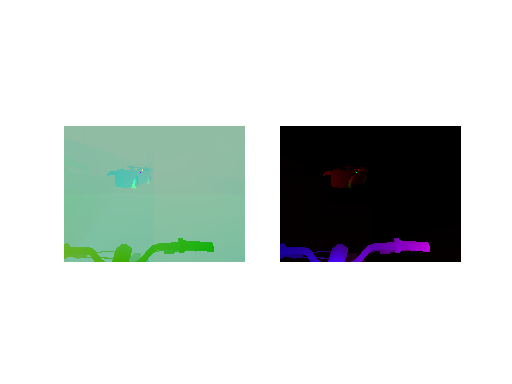

<IPython.core.display.Javascript object>


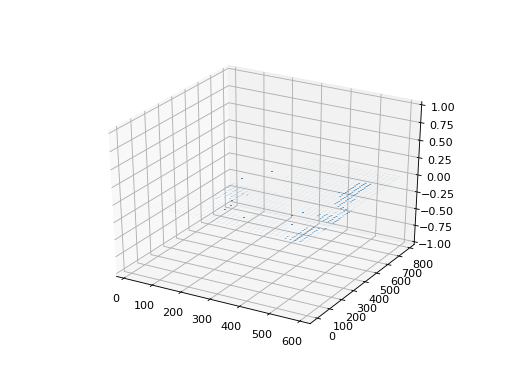

In [69]:
import os
import glob

gtadir = '/mnt/d/games/Grand Theft Auto V/cap/'
capdir = '2018_08_09_00_40_26'
raw = '00004626_velocity.raw'

filename = os.path.join(gtadir, capdir, raw)

scale_z = 1.0
skip = 16

body, (x, y, z, u, v, w) = get_points(filename, skip)
 
print(body[0,0], body[0,-1])
print(body[-1,0], body[-1,-10])

print(body.shape)
print(body.sum())

for vector in [u, v, w]:
    print('%.5f \t %.5f \t %.5f \t %.5f' % (vector.min(), vector.mean(), vector.max(), (vector ** 2).mean()))

    
def plot_image(use_centered, num):
    func = normalize_center if use_centered else lambda x: normalize(x ** 2)
    rgb = np.stack([func(body[:,:,i]) for i in range(3)], -1)
    
    plt.subplot(1, 2, num)
    plt.axis('off')
    plt.imshow(np.uint8(rgb * 255.0))    
    
    
plot_image(True, 1)
plot_image(False, 2)
plt.show()    

quiver_plot(x, y, z, u, v, scale_z * w)